<a href="https://colab.research.google.com/github/WasifAliWasif/pythoncode/blob/main/save_load_model_and_weight_after_epoch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [20]:
import tensorflow as tf
def dataset(path):
   batch = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(96, 96),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    )
   return batch

In [21]:
train_it=dataset("/content/drive/MyDrive/DIR_SYS_FP_DATASET/train")
test_it=dataset("/content/drive/MyDrive/DIR_SYS_FP_DATASET/test")
val_it=dataset("/content/drive/MyDrive/DIR_SYS_FP_DATASET/val")

Found 3286 files belonging to 11 classes.
Found 716 files belonging to 11 classes.
Found 703 files belonging to 11 classes.


In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_it.map(lambda x, y: (normalization_layer(x), y))
class_names = train_it.class_names
num_classes = len(class_names)
data_augmentation = keras.Sequential(  [layers.RandomFlip("horizontal",input_shape=(96,96,3)),layers.RandomRotation(0.1),layers.RandomZoom(0.1),])

 

In [23]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [24]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [14]:
model.add("/content/drive/MyDrive/Check_point_weight/cp.ckpt.data-00000-of-00001")

TypeError: ignored

In [30]:
########################__________________________________Place-check-points-save__________________________######################################
import os
checkpoint_path = "/content/drive/MyDrive/Check_point_weight/"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
########################__________________________________Save-check-points-after-each-epoch__________________________######################################
epochs=10 
history = model.fit(train_it,validation_data=val_it,epochs=epochs,callbacks=[cp_callback])

In [ ]:
########################___________________________________Load-Model-Weight-form-check-points__________________________######################################
model.load_weights(checkpoint_path) 
history = model.fit(train_it,validation_data=val_it,epochs=epochs,callbacks=[cp_callback])

In [ ]:
########################___________________________________Load-Model-Weight-for-specific-epoch__________________________######################################
model.load_weights(checkpoint_path)
history = model.fit(train_it,validation_data=val_it,epochs=epochs,callbacks=[cp_callback],initial_epoch=7)

In [37]:
########################___________________________________Save-Whole-Model-and-Weight __________________________######################################
# serialize model to JSON
model_json = model.to_json()
with open("/content/drive/MyDrive/Check_point_weight/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights( "/content/drive/MyDrive/Check_point_weight/model.h5")
print("Saved model to disk")

Saved model to disk


In [38]:
########################___________________________________Load-Whole-Model-and-Weight __________________________######################################
from tensorflow.keras.models import model_from_json
# load json and create model
json_file = open(  "/content/drive/MyDrive/Check_point_weight/model.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights( "/content/drive/MyDrive/Check_point_weight/model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#score = loaded_model.evaluate(X, Y, verbose=0)
#print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk


In [31]:
predictions = model.predict(x=test_it, steps=len(test_it), verbose=0)

In [33]:
import numpy as np
y_pred=np.argmax(predictions, axis=-1)
y_pred

array([ 8,  4,  1,  3,  9,  5,  9,  3,  1,  7,  8,  8,  0,  9,  6,  8,  5,
        4,  1, 10,  5, 10,  7,  1,  3,  8,  6,  9,  2,  3,  8,  4,  4,  3,
       10,  7,  7,  8,  8, 10,  8,  8,  0,  4,  1,  9, 10,  9,  3,  7,  4,
        5,  8,  8,  0,  7,  3,  5,  8,  8,  2,  4,  5,  9,  5,  8,  1,  3,
        5,  8,  5,  0,  8,  3, 10,  0,  6,  2,  5,  3, 10,  7,  6,  9, 10,
        8,  0,  1,  8,  9,  1, 10,  0,  2,  6,  4,  4,  9,  1,  3,  8,  7,
        3,  5,  6,  0,  2, 10,  8,  7,  1,  1,  4,  8,  1,  0,  9,  8,  7,
       10, 10, 10,  8,  0,  7,  0,  6,  8,  9,  5,  7,  8,  2,  3,  3,  2,
        2,  5,  1,  9,  1,  7,  7,  5,  9,  2,  2, 10, 10,  2,  8,  5,  2,
        1,  6, 10,  9,  1,  8,  5,  9,  0,  3, 10,  2,  1,  4,  9,  1,  4,
        3,  9,  6,  6,  5,  8,  4, 10,  6,  8,  6, 10,  1,  3,  4,  0,  3,
        3,  5,  7,  6,  3,  1, 10,  9,  7,  3,  6,  3,  6,  4,  7,  9,  0,
        8,  3,  7,  5,  0,  3,  4,  8,  5,  4,  2,  0, 10,  0,  5,  4,  8,
        9,  5, 10,  3,  2

In [34]:
true_categories = tf.concat([y for x, y in test_it], axis=-1)
true_categories

<tf.Tensor: shape=(716,), dtype=int32, numpy=
array([10,  6,  0,  4,  1,  3,  7,  1,  0, 10,  4,  1,  8,  8,  0,  6,  6,
        6,  2, 10,  8,  2,  8, 10,  3,  3,  6,  2,  7,  3,  8,  3,  1,  8,
        7,  6, 10,  4,  7,  1,  2,  8,  4,  1, 10,  1,  0,  2,  7,  0,  6,
        8,  8,  5,  5, 10,  7,  8,  8,  6,  4,  8,  1, 10,  2,  9,  9,  8,
        1,  7,  0,  1,  5,  6,  2,  4,  7,  9,  4,  9,  6,  4,  6,  8,  0,
        0,  5,  8,  7,  7,  5,  3,  7,  8,  4, 10,  4,  6,  1,  1,  4,  1,
        1,  8,  2, 10,  8, 10,  9,  3,  3,  5,  3,  5,  5,  7,  0,  4,  0,
        6,  4, 10,  9,  0,  1,  3,  7,  1,  7,  5,  6,  8,  0,  3,  0,  9,
        1,  2,  8,  2,  7,  5,  8,  8,  3, 10,  1,  5,  5,  9, 10,  5,  8,
        1, 10,  1,  3,  8,  8,  3,  7,  2,  8,  1,  8, 10,  5,  9,  6,  9,
        1,  9,  8,  7,  9,  1,  0,  3,  7,  9,  5,  8,  8,  0,  8,  6,  8,
        9,  0,  6,  6,  8,  1,  6,  7,  7,  9,  4,  1,  1,  9,  5,  2,  1,
       10,  5,  3, 10,  4,  3,  9,  3,  0,  0,  4,  0,

NameError: ignored

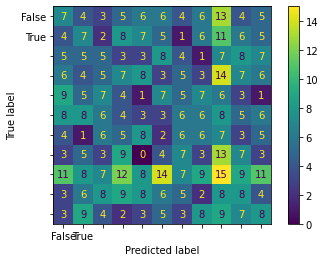

In [36]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(true_categories, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()